import necessary libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os

setting working directory

In [70]:
os.chdir('/home/seam/Documents/$-mentality/coding consideration/Machine Learning/NOTEBOOK_ML_PROJECT')

print current working directory

In [71]:
cwd = os.getcwd()
print(cwd)

/home/seam/Documents/$-mentality/coding consideration/Machine Learning/NOTEBOOK_ML_PROJECT


load and print the dataset 

In [72]:
df = pd.read_csv('Market_food_price.csv')
df.head()

,commodity,market,month,season,supply_level,price_per_kg_tzs
0,Potatoes,Dodoma,11,Harvest,High,1571.0
1,Beans,Arusha,8,Mid,Medium,3342.0
2,Beans,Dodoma,2,Harvest,High,3058.0
3,Potatoes,Dodoma,1,Harvest,High,1518.0
4,Tomatoes,Mbeya,9,Mid,Medium,2163.0


data inspection

In [73]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   commodity         250 non-null    object 
 1   market            250 non-null    object 
 2   month             250 non-null    int64  
 3   season            238 non-null    object 
 4   supply_level      250 non-null    object 
 5   price_per_kg_tzs  238 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 11.8+ KB


In [74]:
# Summary statistics
df.describe()

,month,price_per_kg_tzs
count,250.000000,238.000000
mean,6.448000,2029.823529
std,3.492864,726.378482
min,1.000000,935.000000
25%,3.250000,1342.500000
50%,6.000000,1975.000000
75%,9.000000,2642.500000
max,12.000000,3393.000000


In [75]:
#Check column names
df.columns

Index(['commodity', 'market', 'month', 'season', 'supply_level',
       'price_per_kg_tzs'],
      dtype='object')

In [76]:
# View data shape (rows, columns)
df.shape

(250, 6)

In [77]:
# Check duplicates
df.duplicated().sum()

# Drop duplicates if any
df = df.drop_duplicates()

imputing missing values

In [78]:
# Check missing values properly
missing = df.isnull().sum()
print("Missing values before imputation:")
print(missing[missing > 0])

# Handle missing values
# Price - use median (robust to outliers)
df['price_per_kg_tzs'] = df['price_per_kg_tzs'].fillna(df['price_per_kg_tzs'].median())

# Season - use mode (most frequent) for categorical
df['season'] = df['season'].fillna(df['season'].mode()[0])

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values before imputation:
season              12
price_per_kg_tzs    12
dtype: int64

Missing values after imputation:
commodity           0
market              0
month               0
season              0
supply_level        0
price_per_kg_tzs    0
dtype: int64


In [79]:
df.head(12)

,commodity,market,month,season,supply_level,price_per_kg_tzs
0,Potatoes,Dodoma,11,Harvest,High,1571.0
1,Beans,Arusha,8,Mid,Medium,3342.0
2,Beans,Dodoma,2,Harvest,High,3058.0
3,Potatoes,Dodoma,1,Harvest,High,1518.0
4,Tomatoes,Mbeya,9,Mid,Medium,2163.0
5,Potatoes,Mbeya,3,Harvest,High,1271.0
6,Potatoes,Dar es Salaam,3,Harvest,High,1975.0
7,Rice,Mbeya,9,Mid,Low,2666.0
8,Rice,Mwanza,9,Mid,Low,2656.0
9,Beans,Dar es Salaam,4,Harvest,Low,1975.0


Encoding nominal and ordinal features

In [80]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Columns to encode
nominal_cols = ['commodity', 'market']    # No order - use OneHotEncoder
ordinal_cols = ['season', 'supply_level']  # Has order - use LabelEncoder

# 1️⃣ One-hot encoding for nominal columns (commodity and market)
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_nominal = onehot_encoder.fit_transform(df[nominal_cols])

# Get feature names
feature_names = onehot_encoder.get_feature_names_out(nominal_cols)

# Create DataFrame with encoded columns
encoded_df = pd.DataFrame(
    encoded_nominal, 
    columns=feature_names,
    index=df.index
)

# Drop original nominal columns and add encoded ones
df = df.drop(columns=nominal_cols)
df = pd.concat([df, encoded_df], axis=1)

print(f"✅ One-hot encoding complete!")
print(f"New features created: {feature_names.tolist()}")

# 2️⃣ Label encoding for ordinal columns (season and supply_level)
label_encoders = {}
for col in ordinal_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(f"✅ Label encoding complete for: {ordinal_cols}")

# 3️⃣ Save ALL encoders
encoders = {
    'onehot_encoder': onehot_encoder,
    'label_encoders': label_encoders,
    'feature_names': feature_names.tolist(),
    'nominal_cols': nominal_cols,
    'ordinal_cols': ordinal_cols
}

print("\n✅ All encoders saved in dictionary:")
print(f"   - OneHotEncoder for: {nominal_cols}")
print(f"   - LabelEncoders for: {ordinal_cols}")

✅ One-hot encoding complete!
New features created: ['commodity_Maize', 'commodity_Potatoes', 'commodity_Rice', 'commodity_Tomatoes', 'market_Dar es Salaam', 'market_Dodoma', 'market_Mbeya', 'market_Mwanza']
✅ Label encoding complete for: ['season', 'supply_level']

✅ All encoders saved in dictionary:
   - OneHotEncoder for: ['commodity', 'market']
   - LabelEncoders for: ['season', 'supply_level']


In [81]:
df.head()

,month,season,supply_level,price_per_kg_tzs,commodity_Maize,commodity_Potatoes,commodity_Rice,commodity_Tomatoes,market_Dar es Salaam,market_Dodoma,market_Mbeya,market_Mwanza
0,11,0,0,1571.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8,2,2,3342.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,3058.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,1518.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,9,2,2,2163.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


splitting the data into training and test sets

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score


X = df.drop('price_per_kg_tzs', axis=1)
y = df['price_per_kg_tzs']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Building a linear regression model

In [83]:
# Scale the features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict and evaluate
lr_pred = lr.predict(X_test_scaled)
print("LINEAR REGRESSION RESULTS:")
print(f"R² Score: {r2_score(y_test, lr_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, lr_pred):.2f} TZS")
print()

LINEAR REGRESSION RESULTS:
R² Score: 0.6925
MAE: 212.94 TZS



Building a decision tree model

In [84]:
# Train Decision Tree with slightly better defaults
dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,           # Prevents overfitting
    min_samples_split=5,     # Requires at least 5 samples to split
    min_samples_leaf=2       # Each leaf must have at least 2 samples
)
dt.fit(X_train, y_train)

# Predict and evaluate
dt_pred = dt.predict(X_test)
print("DECISION TREE RESULTS:")
print(f"R² Score: {r2_score(y_test, dt_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, dt_pred):.2f} TZS")

DECISION TREE RESULTS:
R² Score: 0.6653
MAE: 245.74 TZS


checking features importance

In [85]:
# checking top five most important features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)
print("\nTop 5 Most Important Features:")
print(feature_importance.head())


Top 5 Most Important Features:
              feature  importance
3     commodity_Maize    0.464165
4  commodity_Potatoes    0.281487
6  commodity_Tomatoes    0.163918
5      commodity_Rice    0.059093
0               month    0.013967


model vizualization using scatter plot

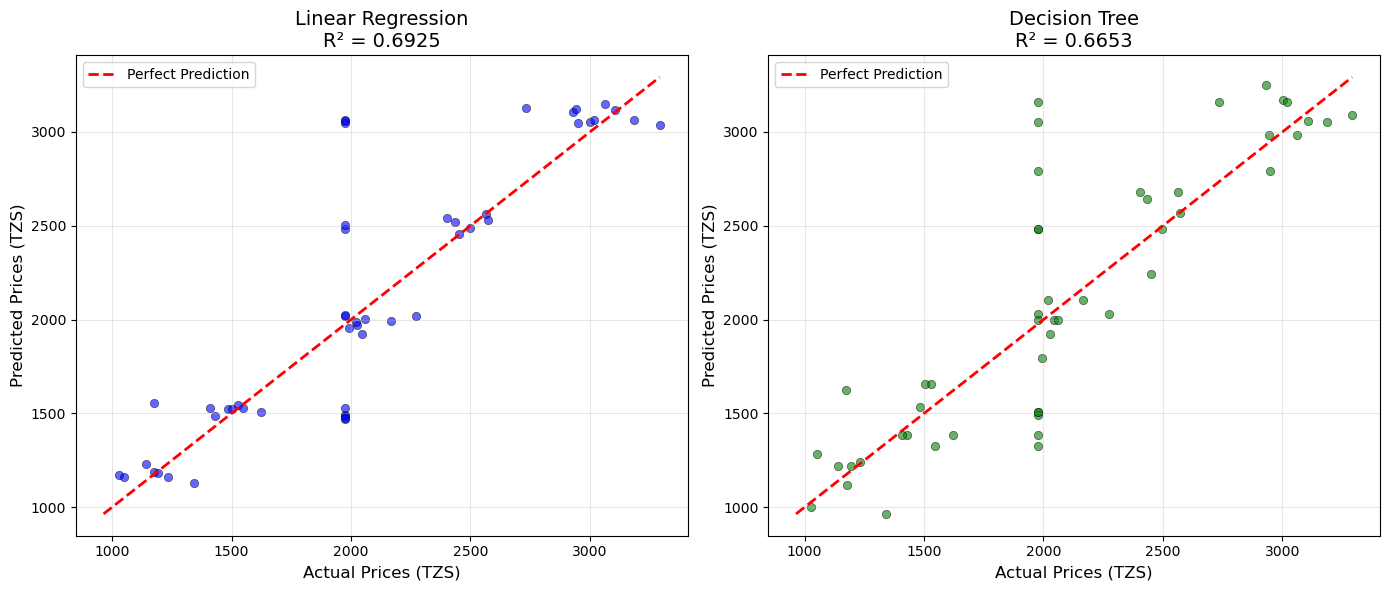

In [86]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Add perfect prediction line
max_val = max(y_test.max(), lr_pred.max(), dt_pred.max())
min_val = min(y_test.min(), lr_pred.min(), dt_pred.min())

# Linear Regression plot
axes[0].scatter(y_test, lr_pred, alpha=0.6, color='blue', edgecolors='black', linewidth=0.5)
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel("Actual Prices (TZS)", fontsize=12)
axes[0].set_ylabel("Predicted Prices (TZS)", fontsize=12)
axes[0].set_title(f"Linear Regression\nR² = {r2_score(y_test, lr_pred):.4f}", fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Decision Tree plot
axes[1].scatter(y_test, dt_pred, alpha=0.6, color='green', edgecolors='black', linewidth=0.5)
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel("Actual Prices (TZS)", fontsize=12)
axes[1].set_ylabel("Predicted Prices (TZS)", fontsize=12)
axes[1].set_title(f"Decision Tree\nR² = {r2_score(y_test, dt_pred):.4f}", fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Pick the best model 

In [87]:
from sklearn.metrics import r2_score

lr_r2 = r2_score(y_test, lr_pred)
dt_r2 = r2_score(y_test, dt_pred)

if dt_r2 > lr_r2:
    best_model = dt
    print(f"✅ Decision Tree performs better (R² = {dt_r2:.4f})")
else:
    best_model = lr
    print(f"✅ Linear Regression performs better (R² = {lr_r2:.4f})")

✅ Linear Regression performs better (R² = 0.6925)


saving developed model 

In [88]:
pickle.dump(best_model, open("model.pkl", "wb"))
pickle.dump(encoders, open("encoder.pkl", "wb"))